<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/Unsupervised%20Learning/%ED%95%B8%EC%A6%88%EC%98%A8%20%EB%B9%84%EC%A7%80%EB%8F%84%20%ED%95%99%EC%8A%B5/Ch_7_%26_8_%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto Encoder

## 피처 추출

* 비지도 학습이 탁월한 영역 중 하나는 피처 추출이다

* 피처 추출은 원본 피처셋에서 새로운 피처 표현을 생성하는 데 사용한다

* 새로운 피처 표현은 학습된 표현이라고 하며 지도 학습 문제에서 예측 성능을 향상시키는 데 사용

## 오토인코더 : 인코더와 디코더

* 오토인코더는 인코더와 디코더 두 부분으로 구성된다

* 인코더 : 입력 피처셋을 표현 학습을 통해 다른 표현으로 변환

* 디코더 : 새로 학습한 표현을 원본 형식으로 변환

* 오토인코더는 원본 피처와 관측치를 기억 (항등 함수) 하지 않음

* 오토인코더는 새로 학습한 표현을 사용해 가능한 한 원본 관측치에 가깝게 (하지만 정확하지 않게) 근사해야 한다

* 오토인코더에는 제약이 있기 때문에 데이터의 내재적 구조를 추출해 원본 데이터의 핵심 특성을 학습하게 된다

* 제약은 오토인코더가 중요한 정보는 추출하고 중요하지 않은 정보는 무시하는 것을 지능적으로 선택하도록 강제한다

## 과소완전 오토인코더

* 인코더 함수의 출력인 h를 원본 관측치 x보다 더 작은 차원으로 제한하여 x를 정확히 복사하지 않고 x의 핵심 특성만 학습하도록 한다

* 인코더의 차원 수가 원본 입력 차원 수보다 작다

* 이러한 방식으로 제약을 받으면, 오토인코더는 디코더가 인코더의 출력을 사용해 관측치를 재구성한 후 재구성 오차가 가능한 한 작도록 손실 함수를 최소화하려고 한다

* 인코더의 출력은 원본 입력보다 크기가 작다. 그러나 디코더의 출력은 재구성된 원본 데이터이므로 원본 입력과 동일한 개수의 차원을 갖는다

## 과대완전 오토인코더

* 인코더가 원본 입력 차원보다 더 많은 수의 차원으로 표현을 학습하면 오토인코더는 과대완전으로 간주한다

* 이러한 오토인코더는 단순히 원본 관측치를 복사하기 때문에 오토인코더의 관소완전 방식으로 원본 분포에 대한 정보를 효율적이고 함축적으로 추출하도록 강요받지 않는다

* 불필요하게 복잡한 함수를 학습하는 것에 대해 신경망에 불이익을 주는 일종의 정규화를 사용한다면 과대완전 오토인코더는 차원 축소 및 자동 피처 엔지니어링에 성공적으로 사용할 수 있다

## 고밀도 VS 희소 오토인코더

* 고밀도 (일반) 오토인코더 : 소수의 피처들을 원본 데이터에서 추출된 가장 핵심적인 정보를 갖는 고밀도 최종 행렬을 출력

* 희소 오토인코더 : 오토인코더가 학습하는 피처에 추출 정보가 더 잘 분배되도록 희소한 최종 행렬을 출력

  - 이를 위해서는 오토인코더의 일부로 재구성 오차뿐만 아니라 오토인코더가 최종 행렬의 희소성을 고려하도록 희소성 패널티를 포함시켜야 한다

  - 은닉층은 소수의 유닛만 동시에 활성화된다는 제약을 극복하기 위해 원본 피처의 수보다 더 많은 유닛을 가지기 때문이다

  - 이러한 방식으로 정의하면 희소 오토인코더는 더 많은 0 값이 포함된 최종 행렬을 출력하고 추출된 정보는 학습된 피처에 더 잘 분배될 것이다

## 노이즈 제거 오토인코더

* 경우에 따라 우리가 설계한 오토인코더가 데이터 노이즈를 더 적극적으로 무시하도록 할 수 있다

* 특히 원본 데이터가 어느 정도 손상됐다고 의심되는 경우 더욱 그렇다

* 노이즈 제거 오토인코더 : 손상된 데이터를 입력으로 사용하고 손상되지 않은 원래 데이터를 가능한 한 최상으로 출력하도록 훈련

## 변분 오토인코더

* 하나의 벡터 대신 두 개의 벡터 (평균 벡터 뮤, 표준 편차 벡터 시그마)를 출력

* 이 두 벡터는 뮤와 시그마의 i번째 요소가 i번째 랜덤 변수의 평균 및 표준 편차에 대응하도록 랜덤 변수를 형성

* 변분 오토인코더는 인코더를 통해 이러한 확률적 출력을 형성함으로써 입력 데이터에서 학습한 내용을 기반으로 연속 공간에서 샘플링할 수 있다

* 변분 오토인코더는 훈련된 케이스에 국한하지 않고, 비록 이전에 정확히 유사한 케이스를 본 적이 없더라도 새로운 케이스를 일반화하고 출력할 수 있다

# Setting

## Library

In [1]:
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [5]:
import lightgbm as lgb

In [6]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from keras.layers import BatchNormalization, Input, Lambda
from keras import regularizers
from keras.losses import mse, binary_crossentropy

# Load Data Set

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path_credit_card = '/content/drive/MyDrive/머신러닝 엔지니어링/핸즈온 비지도 학습/data/creditcard.csv'

data = pd.read_csv(path_credit_card)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Preprocessing

## Split X / y

In [9]:
X = data.copy().drop(['Class','Time'],axis=1)
y = data['Class'].copy()

## Scalering

In [10]:
featuresToScale = X.columns

sX = StandardScaler(copy=True, with_mean=True, with_std=True)

X.loc[:,featuresToScale] = sX.fit_transform(X[featuresToScale])

## Split Train / Test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=2022,
                                                    stratify=y)

In [12]:
X_train_AE = X_train.copy()
X_test_AE = X_test.copy()

# Modeling

## 평가 함수 및 그래프 함수 정의

### 평가 함수

In [13]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF) - np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

### 그래프 함수

In [14]:
def plotResults(trueLabels, anomalyScores, returnPreds = False):

    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']

    precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                           preds['anomalyScore'])
    
    average_precision = average_precision_score(preds['trueLabel'],
                                                preds['anomalyScore'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'],
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
      
        return preds, average_precision  

## 선형 활성화 함수로 구성된 2-계층 완전오토인코더

### 모델 생성

은닉층의 노드 수와 입력층의 노드 수가 같은 완전 오토인코더 생성

In [18]:
model = Sequential()

model.add(Dense(units=len(X_train_AE.columns), 
                activation='linear',
                input_dim=len(X_train_AE.columns)))

model.add(Dense(units=len(X_train_AE.columns),
                activation='linear'))

### 모델 컴파일

In [19]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

### 모델 훈련

In [20]:
num_epochs = 10
batch_size = 32

history = model.fit(x=X_train_AE, y=X_train_AE,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train_AE, X_train_AE),
                    verbose=1)

Epoch 1/10
5964/5964 [==============================] - 29s 4ms/step - loss: 0.0993 - accuracy: 0.8854 - val_loss: 8.6266e-04 - val_accuracy: 0.9902
Epoch 2/10
5964/5964 [==============================] - 28s 5ms/step - loss: 8.7607e-04 - accuracy: 0.9911 - val_loss: 1.3515e-06 - val_accuracy: 0.9995
Epoch 3/10
5964/5964 [==============================] - 28s 5ms/step - loss: 4.8089e-04 - accuracy: 0.9952 - val_loss: 4.6200e-06 - val_accuracy: 0.9989
Epoch 4/10
5964/5964 [==============================] - 26s 4ms/step - loss: 6.9859e-04 - accuracy: 0.9930 - val_loss: 1.1581e-04 - val_accuracy: 0.9987
Epoch 5/10
5964/5964 [==============================] - 27s 5ms/step - loss: 6.0680e-04 - accuracy: 0.9939 - val_loss: 0.0032 - val_accuracy: 0.9749
Epoch 6/10
5964/5964 [==============================] - 24s 4ms/step - loss: 5.5964e-04 - accuracy: 0.9941 - val_loss: 1.2165e-06 - val_accuracy: 0.9996
Epoch 7/10
5964/5964 [==============================] - 26s 4ms/step - loss: 6.2356e-04 - 

### 모델 평가

2938/2938 [==============================] - 4s 1ms/step


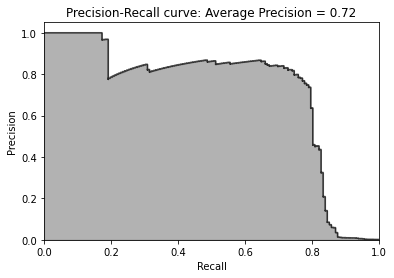

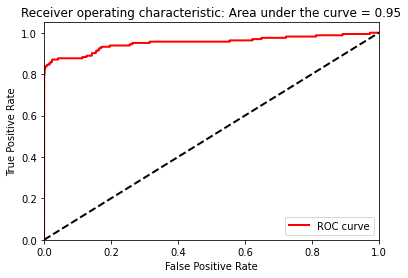

In [21]:
predictions = model.predict(X_test, verbose=1)
anomalyScoresAE = anomalyScores(X_test, predictions)
preds = plotResults(y_test, anomalyScoresAE, True)
model.reset_states()

## 선형 활성화 함수를 가진 2-계층 과소완전 오토인코더

### 모델 생성

은닉층 27개 노드

In [22]:
model = Sequential()

model.add(Dense(units=27,
                activation='linear',
                input_dim=len(X_train_AE.columns)))

model.add(Dense(units=len(X_train_AE.columns),
                activation='linear'))

### 모델 컴파일

In [23]:
model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])

In [24]:
num_epochs = 10
batch_size = 32

history = model.fit(x=X_train_AE, y=X_train_AE,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train_AE, X_train_AE),
                    verbose=1)

Epoch 1/10
5964/5964 [==============================] - 28s 5ms/step - loss: 0.1324 - accuracy: 0.8260 - val_loss: 0.0361 - val_accuracy: 0.9275
Epoch 2/10
5964/5964 [==============================] - 26s 4ms/step - loss: 0.0379 - accuracy: 0.9451 - val_loss: 0.0338 - val_accuracy: 0.9536
Epoch 3/10
5964/5964 [==============================] - 26s 4ms/step - loss: 0.0348 - accuracy: 0.9571 - val_loss: 0.0315 - val_accuracy: 0.9640
Epoch 4/10
5964/5964 [==============================] - 26s 4ms/step - loss: 0.0335 - accuracy: 0.9631 - val_loss: 0.0360 - val_accuracy: 0.9518
Epoch 5/10
5964/5964 [==============================] - 38s 6ms/step - loss: 0.0326 - accuracy: 0.9665 - val_loss: 0.0313 - val_accuracy: 0.9725
Epoch 6/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.0327 - accuracy: 0.9685 - val_loss: 0.0314 - val_accuracy: 0.9684
Epoch 7/10
5964/5964 [==============================] - 41s 7ms/step - loss: 0.0323 - accuracy: 0.9687 - val_loss: 0.0316 - val_ac

### 모델 평가

2938/2938 [==============================] - 4s 1ms/step


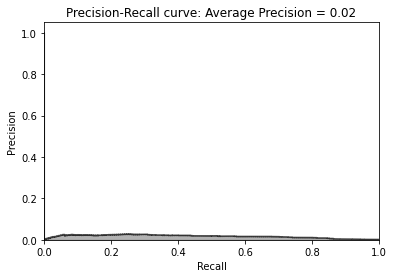

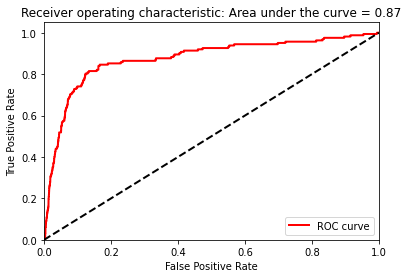

In [26]:
predictions = model.predict(X_test, verbose=1)
anomalyScoresAE = anomalyScores(X_test, predictions)
preds = plotResults(y_test, anomalyScoresAE, True)
model.reset_states()

## 선형 활성화 함수로 구성된 4-계층 과소완전 오토인코더

3개 은닉층에 각각 28개 노드, 27개 노드, 28개 노드

### 모델 생성

In [27]:
model = Sequential()

model.add(Dense(units=28,
                activation='linear',
                input_dim=len(X_train_AE.columns)))

model.add(Dense(units=27,
                activation='linear'))

model.add(Dense(units=28,
                activation='linear'))

model.add(Dense(units=len(X_train_AE.columns),
                activation='linear'))

### 모델 컴파일

In [28]:
model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])

### 모델 훈련

In [29]:
num_epochs = 10
batch_size = 32

history = model.fit(x=X_train_AE, y=X_train_AE,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train_AE, X_train_AE),
                    verbose=1)

Epoch 1/10
5964/5964 [==============================] - 27s 5ms/step - loss: 0.1238 - accuracy: 0.7940 - val_loss: 0.0444 - val_accuracy: 0.9162
Epoch 2/10
5964/5964 [==============================] - 30s 5ms/step - loss: 0.0376 - accuracy: 0.9434 - val_loss: 0.0316 - val_accuracy: 0.9600
Epoch 3/10
5964/5964 [==============================] - 38s 6ms/step - loss: 0.0344 - accuracy: 0.9540 - val_loss: 0.0327 - val_accuracy: 0.9575
Epoch 4/10
5964/5964 [==============================] - 41s 7ms/step - loss: 0.0344 - accuracy: 0.9620 - val_loss: 0.0317 - val_accuracy: 0.9637
Epoch 5/10
5964/5964 [==============================] - 32s 5ms/step - loss: 0.0348 - accuracy: 0.9629 - val_loss: 0.0315 - val_accuracy: 0.9699
Epoch 6/10
5964/5964 [==============================] - 41s 7ms/step - loss: 0.0344 - accuracy: 0.9637 - val_loss: 0.0435 - val_accuracy: 0.9399
Epoch 7/10
5964/5964 [==============================] - 37s 6ms/step - loss: 0.0344 - accuracy: 0.9648 - val_loss: 0.0313 - val_ac

### 모델 평가

2938/2938 [==============================] - 5s 2ms/step


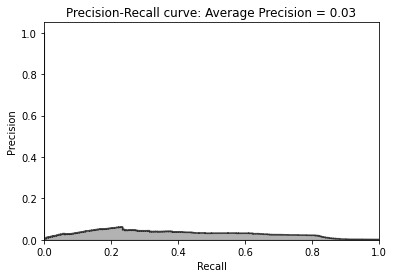

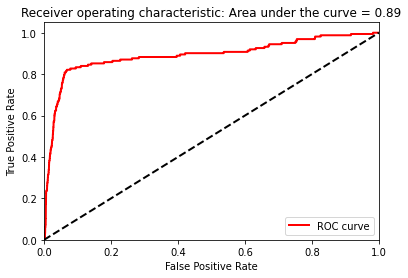

In [30]:
predictions = model.predict(X_test, verbose=1)
anomalyScoresAE = anomalyScores(X_test, predictions)
preds = plotResults(y_test, anomalyScoresAE, True)
model.reset_states()

## ReLu 활성화 함수를 가진 4-계층 과소완전 오토인코더

### 모델 생성

4개의 은닉층에 각각 27개 노드, 22개 노드, 27개 노드, 29개 노드

In [31]:
model = Sequential()

model.add(Dense(units=27,
                activation='relu',
                input_dim=len(X_train_AE.columns)))

model.add(Dense(units=22,
                activation='relu'))

model.add(Dense(units=27,
                activation='relu'))

model.add(Dense(units=len(X_train_AE.columns), 
                activation='relu'))

### 모델 컴파일

In [32]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

### 모델 훈련

In [33]:
num_epochs = 10
batch_size = 32

history = model.fit(x=X_train_AE, y=X_train_AE,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train_AE, X_train_AE),
                    verbose=1)

Epoch 1/10
5964/5964 [==============================] - 36s 6ms/step - loss: 0.6892 - accuracy: 0.6138 - val_loss: 0.6241 - val_accuracy: 0.7217
Epoch 2/10
5964/5964 [==============================] - 43s 7ms/step - loss: 0.6197 - accuracy: 0.7325 - val_loss: 0.6457 - val_accuracy: 0.7069
Epoch 3/10
5964/5964 [==============================] - 28s 5ms/step - loss: 0.6131 - accuracy: 0.7466 - val_loss: 0.6079 - val_accuracy: 0.7628
Epoch 4/10
5964/5964 [==============================] - 27s 5ms/step - loss: 0.6100 - accuracy: 0.7533 - val_loss: 0.6285 - val_accuracy: 0.7208
Epoch 5/10
5964/5964 [==============================] - 29s 5ms/step - loss: 0.6146 - accuracy: 0.7438 - val_loss: 0.6062 - val_accuracy: 0.7699
Epoch 6/10
5964/5964 [==============================] - 38s 6ms/step - loss: 0.6095 - accuracy: 0.7572 - val_loss: 0.6189 - val_accuracy: 0.7365
Epoch 7/10
5964/5964 [==============================] - 38s 6ms/step - loss: 0.6076 - accuracy: 0.7615 - val_loss: 0.6059 - val_ac

### 모델 평가

2938/2938 [==============================] - 4s 1ms/step


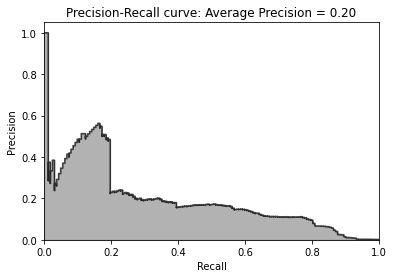

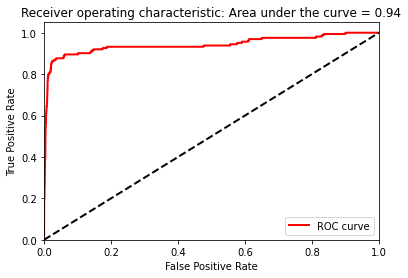

In [34]:
predictions = model.predict(X_test, verbose=1)
anomalyScoresAE = anomalyScores(X_test, predictions)
preds = plotResults(y_test, anomalyScoresAE, True)
model.reset_states()

## 선형 활성화 함수를 가진 2-계층 과대완전 오토인코더

### 모델 생성

은닉층 40개 노드

In [36]:
model = Sequential()

model.add(Dense(units=40,
                activation='linear',
                input_dim=len(X_train_AE.columns)))

model.add(Dense(units=len(X_train_AE.columns), 
                activation='linear'))

### 모델 컴파일


In [37]:
model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])

### 모델 훈련

In [38]:
num_epochs = 10
batch_size = 32

history = model.fit(x=X_train_AE, y=X_train_AE,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train_AE, X_train_AE),
                    verbose=1)

Epoch 1/10
5964/5964 [==============================] - 27s 4ms/step - loss: 0.0396 - accuracy: 0.9442 - val_loss: 5.0134e-05 - val_accuracy: 0.9960
Epoch 2/10
5964/5964 [==============================] - 24s 4ms/step - loss: 9.5733e-04 - accuracy: 0.9935 - val_loss: 0.0027 - val_accuracy: 0.9909
Epoch 3/10
5964/5964 [==============================] - 25s 4ms/step - loss: 6.9039e-04 - accuracy: 0.9926 - val_loss: 6.0789e-05 - val_accuracy: 0.9993
Epoch 4/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.0011 - accuracy: 0.9911 - val_loss: 6.9337e-04 - val_accuracy: 0.9883
Epoch 5/10
5964/5964 [==============================] - 23s 4ms/step - loss: 7.6013e-04 - accuracy: 0.9945 - val_loss: 4.0479e-04 - val_accuracy: 0.9860
Epoch 6/10
5964/5964 [==============================] - 23s 4ms/step - loss: 5.9058e-04 - accuracy: 0.9935 - val_loss: 0.0018 - val_accuracy: 0.9935
Epoch 7/10
5964/5964 [==============================] - 23s 4ms/step - loss: 9.3048e-04 - accuracy

### 모델 평가

2938/2938 [==============================] - 4s 1ms/step


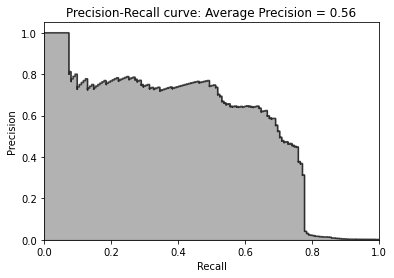

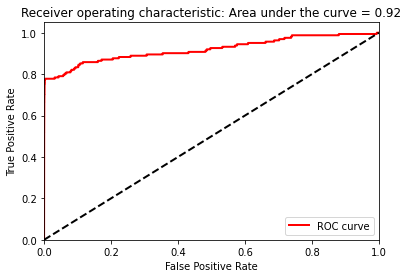

In [39]:
predictions = model.predict(X_test, verbose=1)
anomalyScoresAE = anomalyScores(X_test, predictions)
preds = plotResults(y_test, anomalyScoresAE, True)
model.reset_states()

## 드롭아웃과 선형 활성화 함수를 가진 2-계층 과대완전 오토인코더

### 모델 생성

In [40]:
model = Sequential()

model.add(Dense(units=40,
                activation='linear',
                input_dim=len(X_train_AE.columns)))

model.add(Dropout(0.10))

model.add(Dense(units=len(X_train_AE.columns),
                activation='linear'))

### 모델 컴파일

In [41]:
model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])

### 모델 훈련

In [42]:
num_epochs = 10
batch_size = 32

history = model.fit(x=X_train_AE, y=X_train_AE,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train_AE, X_train_AE),
                    verbose=1)

Epoch 1/10
5964/5964 [==============================] - 41s 7ms/step - loss: 0.1577 - accuracy: 0.7253 - val_loss: 0.0086 - val_accuracy: 0.9707
Epoch 2/10
5964/5964 [==============================] - 30s 5ms/step - loss: 0.0771 - accuracy: 0.7846 - val_loss: 0.0083 - val_accuracy: 0.9736
Epoch 3/10
5964/5964 [==============================] - 30s 5ms/step - loss: 0.0755 - accuracy: 0.7844 - val_loss: 0.0076 - val_accuracy: 0.9746
Epoch 4/10
5964/5964 [==============================] - 37s 6ms/step - loss: 0.0761 - accuracy: 0.7852 - val_loss: 0.0074 - val_accuracy: 0.9746
Epoch 5/10
5964/5964 [==============================] - 39s 6ms/step - loss: 0.0756 - accuracy: 0.7852 - val_loss: 0.0068 - val_accuracy: 0.9787
Epoch 6/10
5964/5964 [==============================] - 30s 5ms/step - loss: 0.0759 - accuracy: 0.7851 - val_loss: 0.0067 - val_accuracy: 0.9782
Epoch 7/10
5964/5964 [==============================] - 29s 5ms/step - loss: 0.0748 - accuracy: 0.7845 - val_loss: 0.0070 - val_ac

### 모델 평가

2938/2938 [==============================] - 5s 2ms/step


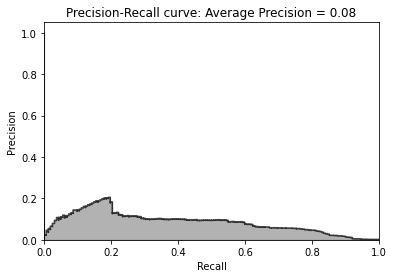

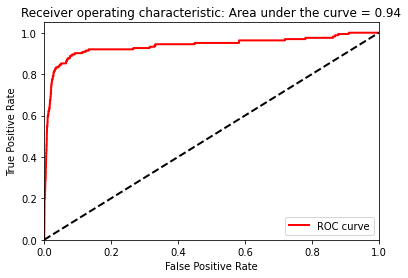

In [43]:
predictions = model.predict(X_test, verbose=1)
anomalyScoresAE = anomalyScores(X_test, predictions)
preds = plotResults(y_test, anomalyScoresAE, True)
model.reset_states()

## 선형 활성화 함수를 가진 2-계층 희소 과대완전 오토인코더

### 모델 생성

은닉층 40개 노드

In [44]:
model = Sequential()

model.add(Dense(units=40,
                activation='linear',
                activity_regularizer=regularizers.l1(10e-5), # 희소성을 고려
                input_dim=len(X_train_AE.columns)))

model.add(Dense(units=len(X_train_AE.columns),
                activation='linear'))

### 모델 컴파일

In [45]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

### 모델 훈련

In [46]:
num_epochs = 10
batch_size = 32

history = model.fit(x=X_train_AE, y=X_train_AE,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train_AE, X_train_AE),
                    verbose=1)

Epoch 1/10
5964/5964 [==============================] - 33s 5ms/step - loss: 0.0414 - accuracy: 0.9469 - val_loss: 0.0030 - val_accuracy: 0.9946
Epoch 2/10
5964/5964 [==============================] - 32s 5ms/step - loss: 0.0033 - accuracy: 0.9927 - val_loss: 0.0032 - val_accuracy: 0.9954
Epoch 3/10
5964/5964 [==============================] - 41s 7ms/step - loss: 0.0028 - accuracy: 0.9919 - val_loss: 0.0018 - val_accuracy: 0.9990
Epoch 4/10
5964/5964 [==============================] - 36s 6ms/step - loss: 0.0025 - accuracy: 0.9930 - val_loss: 0.0022 - val_accuracy: 0.9916
Epoch 5/10
5964/5964 [==============================] - 42s 7ms/step - loss: 0.0028 - accuracy: 0.9912 - val_loss: 0.0015 - val_accuracy: 0.9989
Epoch 6/10
5964/5964 [==============================] - 42s 7ms/step - loss: 0.0024 - accuracy: 0.9924 - val_loss: 0.0014 - val_accuracy: 0.9995
Epoch 7/10
5964/5964 [==============================] - 30s 5ms/step - loss: 0.0023 - accuracy: 0.9910 - val_loss: 0.0089 - val_ac

### 모델 평가

2938/2938 [==============================] - 4s 1ms/step


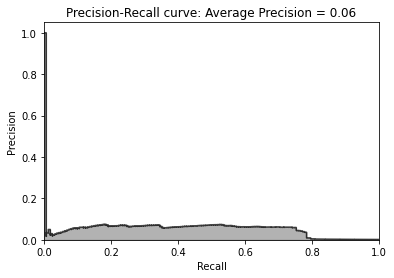

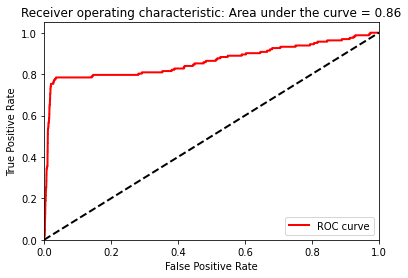

In [47]:
predictions = model.predict(X_test, verbose=1)
anomalyScoresAE = anomalyScores(X_test, predictions)
preds = plotResults(y_test, anomalyScoresAE, True)
model.reset_states()

## 드롭아웃과 선형 활성화 함수를 가진 2-계층 희소 과대완전 오토인코더

### 모델 생성

은닉층 40개 노드, 드롭아웃 비율: 5%

In [49]:
model = Sequential()

model.add(Dense(units=40,
                activation='linear',
                activity_regularizer=regularizers.l1(10e-5),
                input_dim=len(X_train_AE.columns)))

model.add(Dropout(0.05))

model.add(Dense(units=len(X_train_AE.columns),
                activation='linear'))

### 모델 컴파일

In [50]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

### 모델 훈련

In [51]:
num_epochs = 10
batch_size = 32

history = model.fit(x=X_train_AE, y=X_train_AE,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train_AE, X_train_AE),
                    verbose=1)

Epoch 1/10
5964/5964 [==============================] - 30s 5ms/step - loss: 0.1033 - accuracy: 0.8069 - val_loss: 0.0050 - val_accuracy: 0.9803
Epoch 2/10
5964/5964 [==============================] - 28s 5ms/step - loss: 0.0409 - accuracy: 0.8627 - val_loss: 0.0078 - val_accuracy: 0.9791
Epoch 3/10
5964/5964 [==============================] - 29s 5ms/step - loss: 0.0400 - accuracy: 0.8620 - val_loss: 0.0042 - val_accuracy: 0.9850
Epoch 4/10
5964/5964 [==============================] - 27s 5ms/step - loss: 0.0406 - accuracy: 0.8630 - val_loss: 0.0047 - val_accuracy: 0.9832
Epoch 5/10
5964/5964 [==============================] - 29s 5ms/step - loss: 0.0391 - accuracy: 0.8636 - val_loss: 0.0041 - val_accuracy: 0.9814
Epoch 6/10
5964/5964 [==============================] - 28s 5ms/step - loss: 0.0392 - accuracy: 0.8629 - val_loss: 0.0039 - val_accuracy: 0.9841
Epoch 7/10
5964/5964 [==============================] - 28s 5ms/step - loss: 0.0396 - accuracy: 0.8627 - val_loss: 0.0053 - val_ac

### 모델 평가

2938/2938 [==============================] - 4s 1ms/step


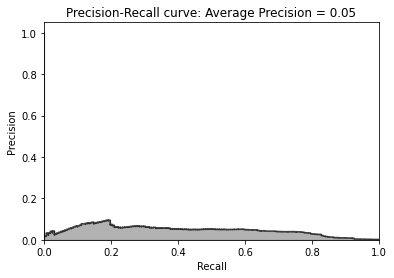

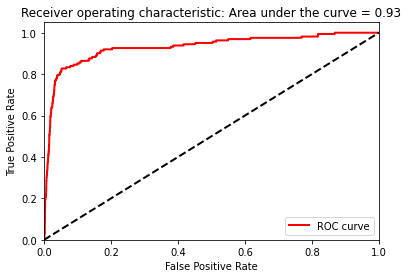

In [52]:
predictions = model.predict(X_test, verbose=1)
anomalyScoresAE = anomalyScores(X_test, predictions)
preds = plotResults(y_test, anomalyScoresAE, True)
model.reset_states()

## 선형 활성화 함수를 가진 2-계층 노이즈 제거 과소완전 오토인코더

### 노이즈 생성

In [53]:
noise_factor = 0.50
X_train_AE_noisy = X_train_AE.copy() + noise_factor * np.random.normal(loc=0.0,
                                                                       scale=1.0,
                                                                       size=X_train_AE.shape)

X_test_AE_noisy = X_test_AE.copy() + noise_factor * np.random.normal(loc=0.0,
                                                                     scale=1.0,
                                                                     size=X_test_AE.shape) 

### 모델 생성

은닉층 27개 노드

In [54]:
model = Sequential()

model.add(Dense(units=27,
                activation='linear',
                input_dim=len(X_train_AE.columns)))

model.add(Dense(units=len(X_train_AE.columns), 
                activation='linear'))

### 모델 컴파일


In [55]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

### 모델 훈련

In [56]:
num_epochs = 10
batch_size = 32

history = model.fit(x=X_train_AE_noisy, y=X_train_AE_noisy,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train_AE, X_train_AE),
                    verbose=1)

Epoch 1/10
5964/5964 [==============================] - 27s 4ms/step - loss: 0.1403 - accuracy: 0.8101 - val_loss: 0.0355 - val_accuracy: 0.9575
Epoch 2/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.0529 - accuracy: 0.9104 - val_loss: 0.0331 - val_accuracy: 0.9639
Epoch 3/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.0505 - accuracy: 0.9138 - val_loss: 0.0327 - val_accuracy: 0.9657
Epoch 4/10
5964/5964 [==============================] - 26s 4ms/step - loss: 0.0504 - accuracy: 0.9166 - val_loss: 0.0325 - val_accuracy: 0.9681
Epoch 5/10
5964/5964 [==============================] - 37s 6ms/step - loss: 0.0496 - accuracy: 0.9154 - val_loss: 0.0328 - val_accuracy: 0.9603
Epoch 6/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.0498 - accuracy: 0.9126 - val_loss: 0.0312 - val_accuracy: 0.9699
Epoch 7/10
5964/5964 [==============================] - 26s 4ms/step - loss: 0.0499 - accuracy: 0.9177 - val_loss: 0.0313 - val_ac

### 모델 평가

2938/2938 [==============================] - 4s 1ms/step


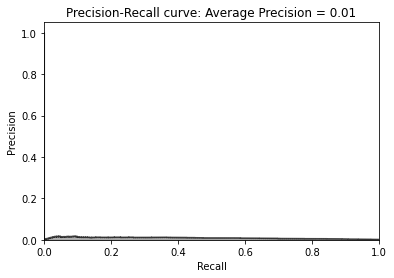

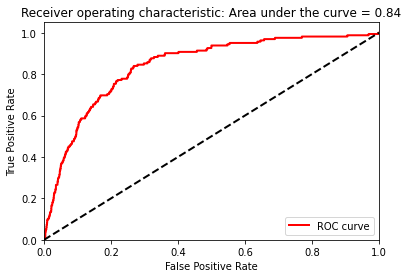

In [57]:
predictions = model.predict(X_test, verbose=1)
anomalyScoresAE = anomalyScores(X_test, predictions)
preds = plotResults(y_test, anomalyScoresAE, True)
model.reset_states()

## 선형 활성화 함수를 가진 2-계층 노이즈 제거 과대완전 오토인코더

### 노이즈 생성

In [58]:
noise_factor = 0.50
X_train_AE_noisy = X_train_AE.copy() + noise_factor * np.random.normal(loc=0.0,
                                                                       scale=1.0,
                                                                       size=X_train_AE.shape)

X_test_AE_noisy = X_test_AE.copy() + noise_factor * np.random.normal(loc=0.0,
                                                                     scale=1.0,
                                                                     size=X_test_AE.shape) 

### 모델 생성

은닉층 40개 노드, 희소성 정규화, 드롭아웃 비율 : 5%


In [59]:
model = Sequential()

model.add(Dense(units=40,
                activation='linear',
                activity_regularizer=regularizers.l1(10e-5),
                input_dim=len(X_train_AE.columns)))

model.add(Dropout(0.05))

model.add(Dense(units=len(X_train_AE.columns), 
                activation='linear'))

### 모델 컴파일

In [60]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

### 모델 훈련

In [61]:
num_epochs = 10
batch_size = 32

history = model.fit(x=X_train_AE_noisy, y=X_train_AE_noisy,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train_AE, X_train_AE),
                    verbose=1)

Epoch 1/10
5964/5964 [==============================] - 28s 5ms/step - loss: 0.1105 - accuracy: 0.7983 - val_loss: 0.0045 - val_accuracy: 0.9832
Epoch 2/10
5964/5964 [==============================] - 27s 5ms/step - loss: 0.0521 - accuracy: 0.8470 - val_loss: 0.0046 - val_accuracy: 0.9841
Epoch 3/10
5964/5964 [==============================] - 27s 5ms/step - loss: 0.0502 - accuracy: 0.8467 - val_loss: 0.0043 - val_accuracy: 0.9797
Epoch 4/10
5964/5964 [==============================] - 27s 5ms/step - loss: 0.0504 - accuracy: 0.8470 - val_loss: 0.0039 - val_accuracy: 0.9864
Epoch 5/10
5964/5964 [==============================] - 28s 5ms/step - loss: 0.0502 - accuracy: 0.8470 - val_loss: 0.0047 - val_accuracy: 0.9788
Epoch 6/10
5964/5964 [==============================] - 28s 5ms/step - loss: 0.0491 - accuracy: 0.8483 - val_loss: 0.0060 - val_accuracy: 0.9729
Epoch 7/10
5964/5964 [==============================] - 27s 5ms/step - loss: 0.0495 - accuracy: 0.8486 - val_loss: 0.0290 - val_ac

### 모델 평가

2938/2938 [==============================] - 5s 2ms/step


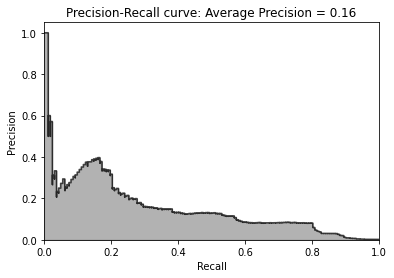

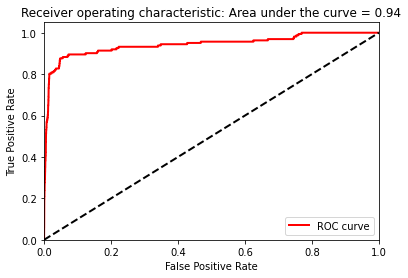

In [62]:
predictions = model.predict(X_test, verbose=1)
anomalyScoresAE = anomalyScores(X_test, predictions)
preds = plotResults(y_test, anomalyScoresAE, True)
model.reset_states()